<a href="https://colab.research.google.com/github/Kate-Strydom/cse450/blob/main/MNIST_Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MNIST dataset for handwritten digit recognition.

"The MNIST dataset consists of images of digits from a variety of scanned documents. Each image is a 28X28 pixel square. In this dataset 60,000 images are used to train the model and 10,000 images are used to test the model. There are 10 digits (0 to 9) or 10 classes to predict."

https://www.analyticsvidhya.com/blog/2021/06/image-processing-using-cnn-a-beginners-guide/:

###load libraries

In [21]:
# import libraries
# Core
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import matplotlib.pyplot as plt
%matplotlib inline
import time
import warnings
warnings.filterwarnings("ignore")

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from keras.utils.vis_utils import plot_model

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.datasets import mnist


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

The training set contains 60k images and the testing set contains 10k images.

The training input vector is of the dimension [60000 X 28 X 28].

The training output vector is of the dimension [60000 X 1].

Each individual input vector is of the dimension [28 X 28].

Each individual output vector is of the dimension [1].

In [2]:
# Random seeds
def set_seed(seed=72):
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seed()

###Load MNIST dataset

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


BEFORE:



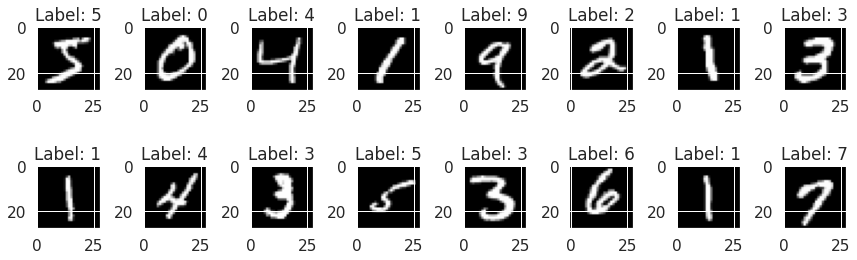

AFTER:



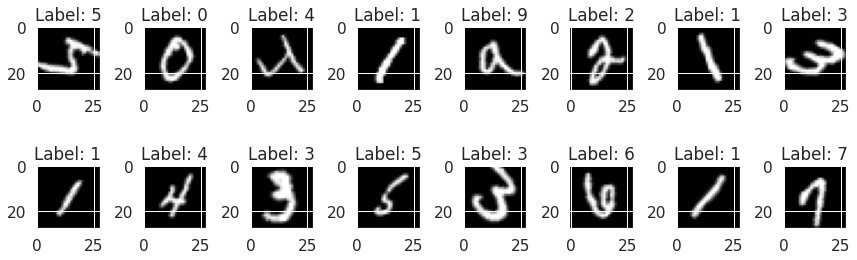

In [27]:
# visualization with data augmentation
# create the class object
datagen = ImageDataGenerator(rotation_range=50, # rotation
                             # width_shift_range=0.2, # horizontal shift
                             # height_shift_range=0.2, # vertical shift
                              zoom_range=0.2, # zoom
                            #  brightness_range=[0.2,1.2], # brightness
                              rescale=1./255,)
# fit the generator
datagen.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(x_train[i],cmap=plt.get_cmap('gray'))
     ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(x_train.reshape(x_train.shape[0], 28, 28, 1),
                         y_train.reshape(y_train.shape[0], 1),
                         batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap=plt.get_cmap('gray'))
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

## Load Train and Test Datasets

In [4]:
# compute the number of labels
num_labels = np.amax(y_train) + 1
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
# we train our network using float data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [18]:
# Define model
def build_model():
    model = keras.Sequential([

        # Data Augmentation
        preprocessing.RandomRotation(factor=0.05, fill_mode='constant'),     # 18 degrees
        preprocessing.RandomZoom(height_factor=(-0.2,0.2), width_factor=(-0.2,0.2), fill_mode='constant'),  # 20%

        # Convolutional layer 1
        layers.Conv2D(filters=64, kernel_size=5, strides=1, padding='same', input_shape=[28,28,1], activation='relu'),
        layers.MaxPool2D(pool_size=2, padding='same'),
        layers.Dropout(rate=0.3),

        # Convolutional layer 2
        layers.Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'),
        layers.MaxPool2D(pool_size=4, padding='same'),
        layers.Dropout(rate=0.3),
        layers.Flatten(),

        # Hidden layer 3
        layers.Dense(units=256, activation='relu'),
        layers.Dropout(rate=0.4),

        # Output layer (softmax returns a probability distribution)
        layers.Dense(units=10, activation='softmax')
    ])

    # Define optimizer, loss function and accuracy metric
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['sparse_categorical_accuracy'])
    
    return model


In [22]:
# Build and train model
model = build_model()
history = model.fit(x_train,
       y_train,
       validation_data=(x_test, y_test),
        epochs=50,
        batch_size=200,
        #callbacks=[early_stopping, reduce_lr],
        verbose=False
    )

ValueError: ignored

In [126]:
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()